## Import Libraries

In [ ]:
from torchmetrics.classification import MulticlassConfusionMatrix
import unicodedata

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import make_grid
from torchvision import models
import torchvision
import torchvision.transforms as transforms
from PIL import Image

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Download Data

In [ ]:
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 43629957.26it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


## Check Data

In [ ]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

## Check shape of *data*

In [ ]:
cifar10.data[0].shape

(32, 32, 3)

## Define function that prints images

In [ ]:
def display_images():
    fig, subplots = plt.subplots(1, 5, figsize=(13, 6))
    for i in range(5):
        axi1 = subplots.flat[i]
        original_img = Image.fromarray(cifar10.data[i])
        axi1.imshow(original_img)
        axi1.set_title('original_img')

## Print images

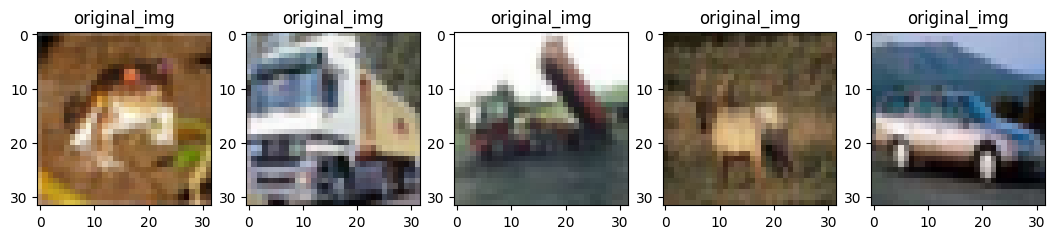

In [ ]:
display_images()

## Check augmented image

In [ ]:
def display_augmented_images(aug_f):
    fig, subplots = plt.subplots(2, 5, figsize=(13, 6))
    for i in range(5):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+5]

        original_img = Image.fromarray(cifar10.data[i])
        augmented_img = aug_f(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

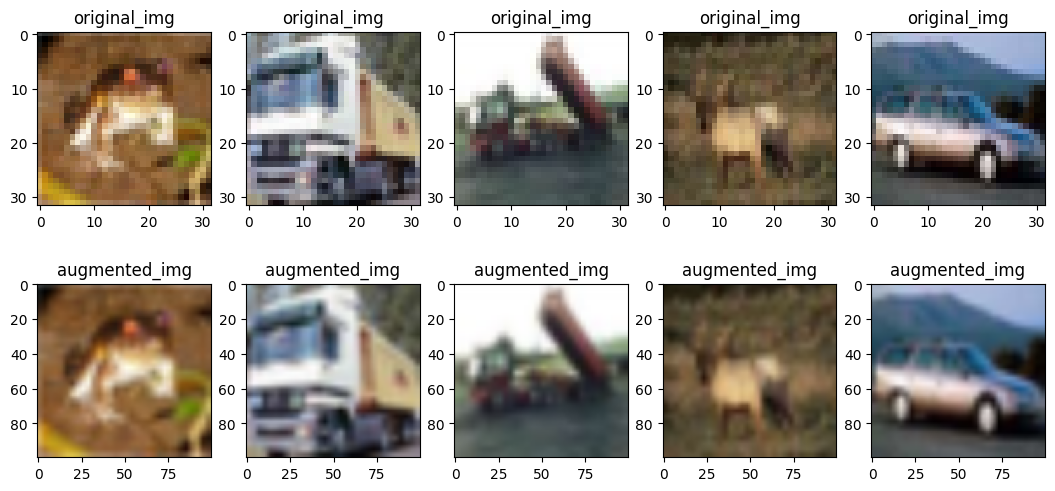

In [ ]:
resize = transforms.Resize((100, 100))
display_augmented_images(resize)

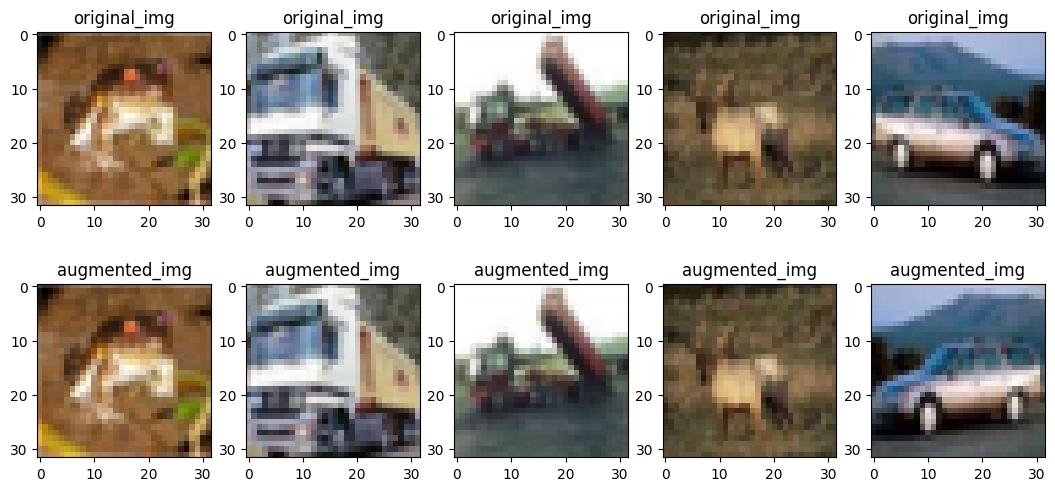

In [ ]:
flip = transforms.RandomHorizontalFlip(p=0.5)
display_augmented_images(flip)

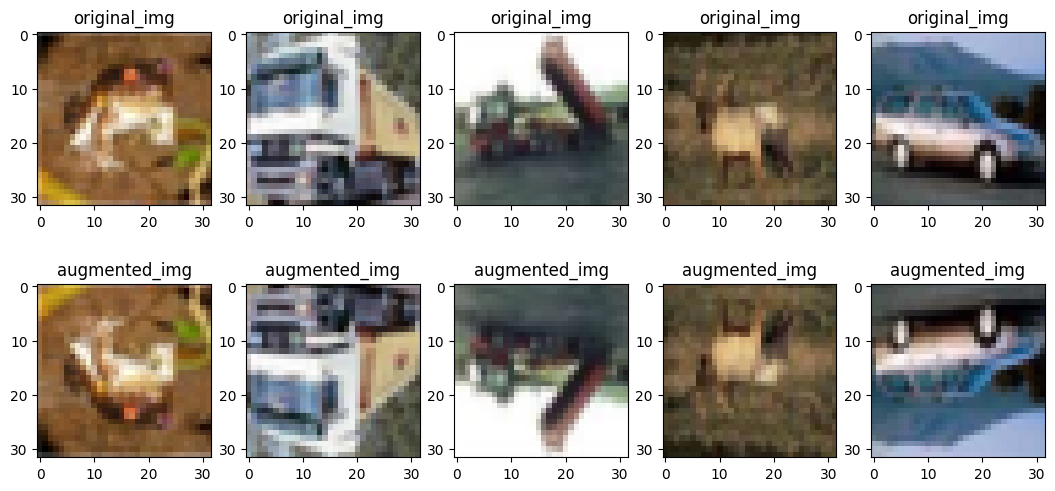

In [ ]:
filp2 = transforms.RandomVerticalFlip(p=1)
display_augmented_images(filp2)

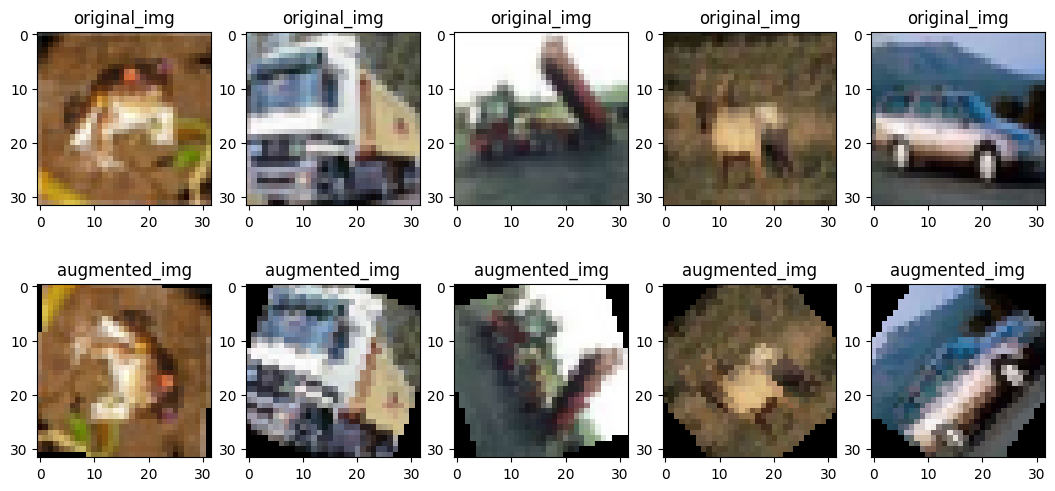

In [ ]:
Rotation = transforms.RandomRotation(180)
display_augmented_images(Rotation)

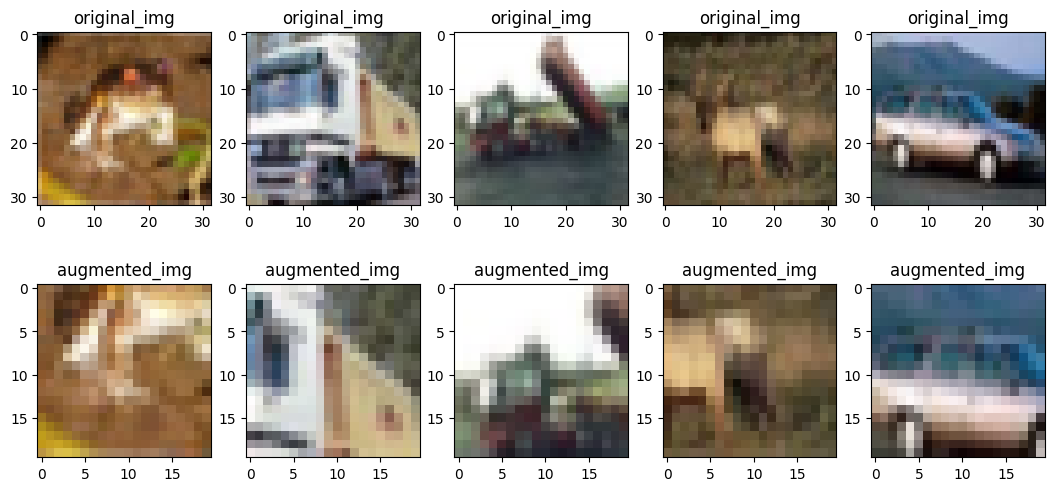

In [ ]:
crop = transforms.RandomCrop((20, 20))
display_augmented_images(crop)

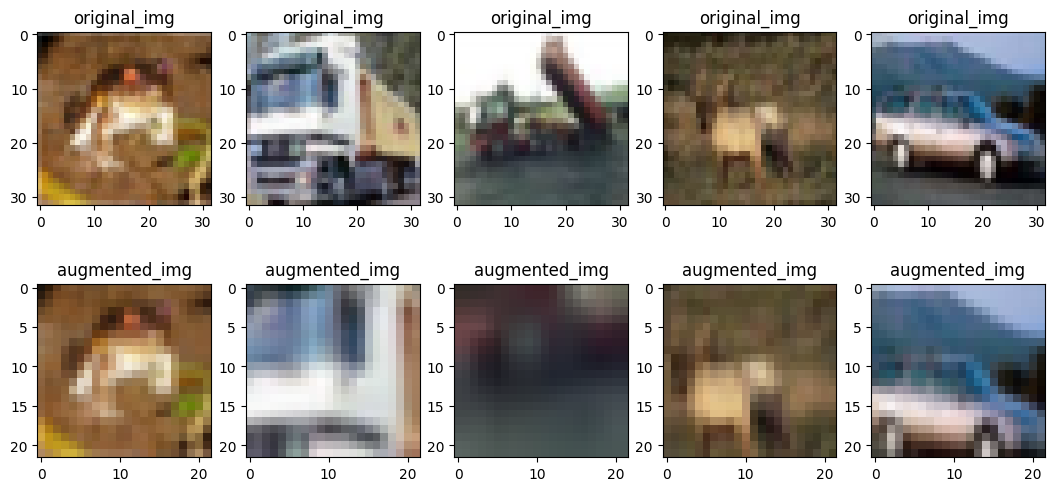

In [ ]:
re_crop = transforms.RandomResizedCrop((22, 22))
display_augmented_images(re_crop)

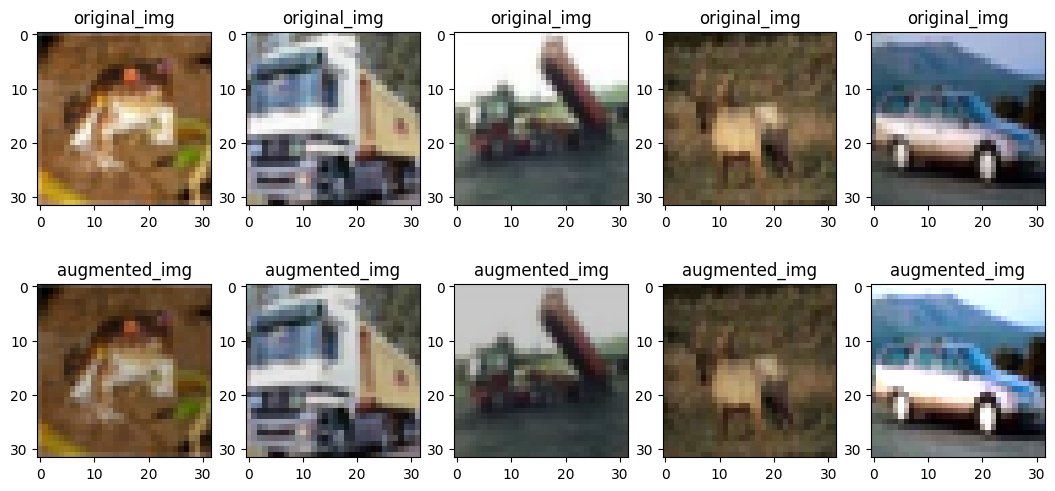

In [ ]:
bright = transforms.ColorJitter(brightness=(0.1, 2)) # min, max
display_augmented_images(bright)

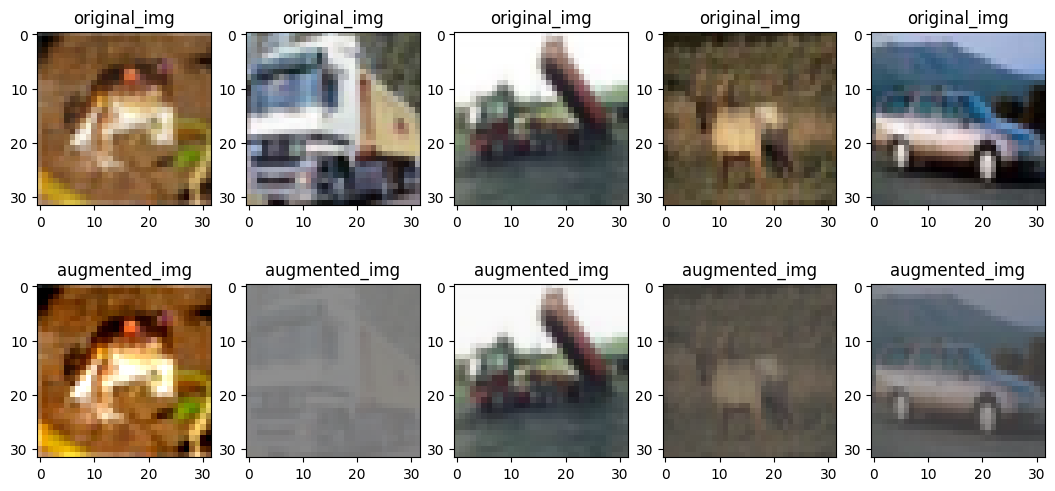

In [ ]:
cont = transforms.ColorJitter(contrast=(0.1, 2))
display_augmented_images(cont)

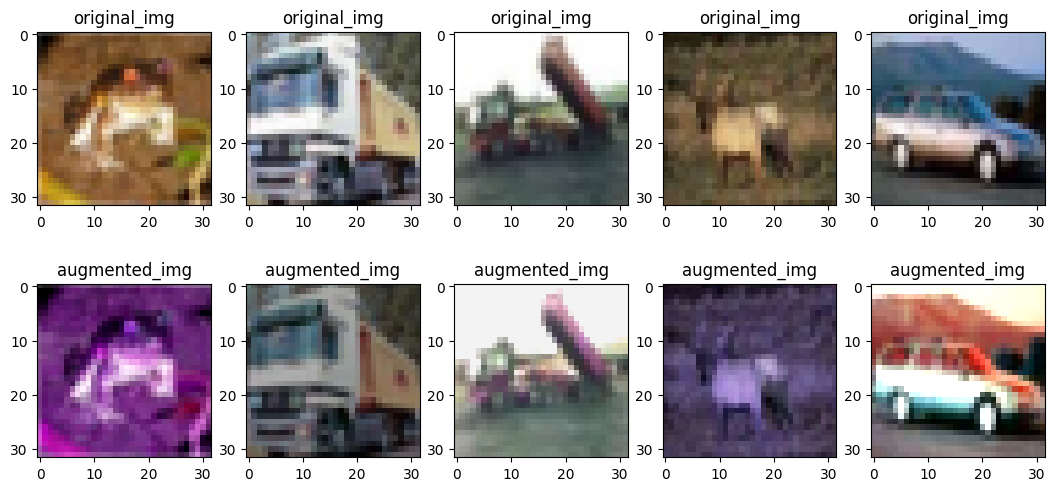

In [ ]:
# 0.5~ 1.5 사이의 값으로 무작위 선택
color = transforms.ColorJitter(brightness=0.5, # 밝기
                               contrast=0.5,   # 대비
                               saturation=0.5, # 채도
                               hue=0.5)     # 색조
display_augmented_images(color)

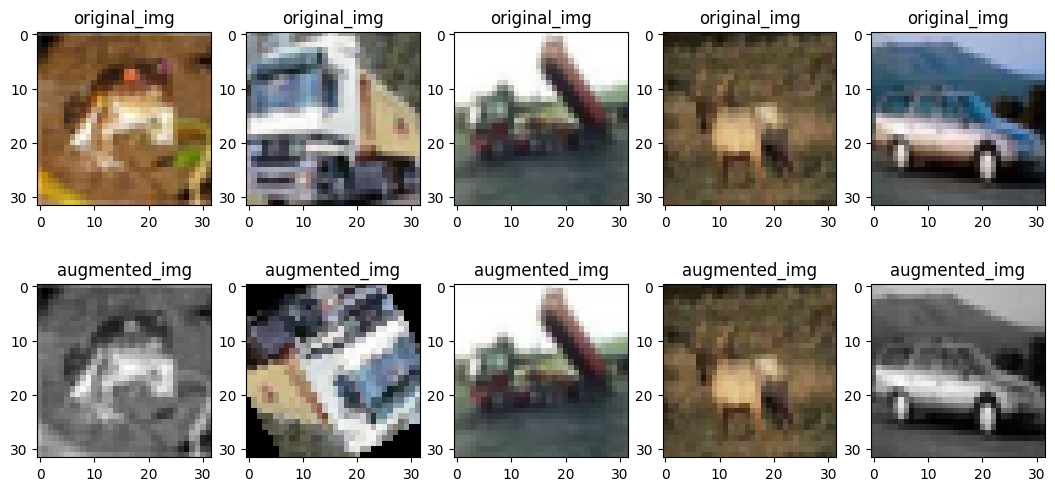

In [ ]:
random = transforms.RandomChoice([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(180),
    transforms.RandomResizedCrop((240, 240)),
    transforms.RandomGrayscale(p=1)
])
display_augmented_images(random)

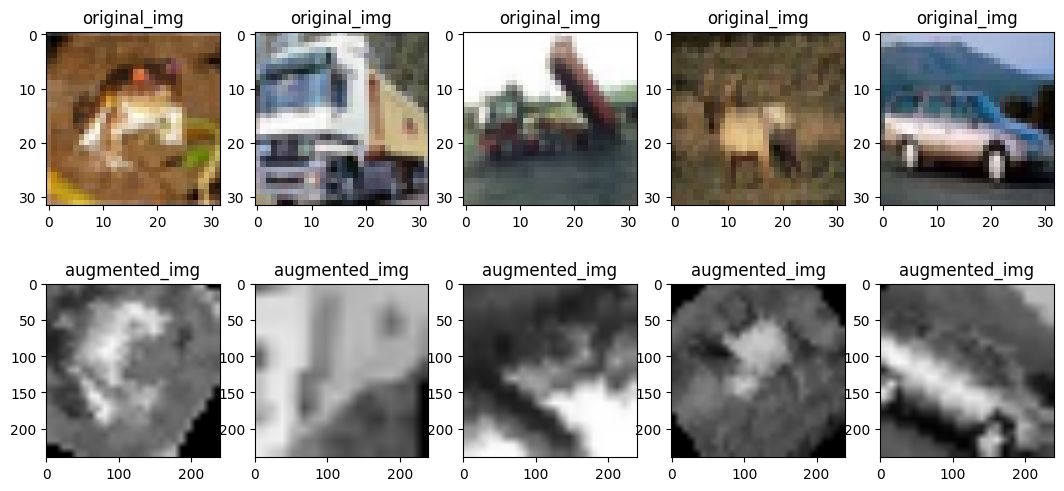

In [ ]:
compose = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(180),
    transforms.RandomResizedCrop((240, 240)),
    transforms.RandomGrayscale(p=1)
])
display_augmented_images(compose)